In [1]:
import numpy as np
import matplotlib.pyplot as plt
import slugger as slug
import pandas as pd
import matplotlib.ticker as ticker


params = {'text.usetex': False, 'mathtext.fontset': 'stix'}
plt.rcParams.update(params)
%matplotlib inline

In [3]:
bad_gp2_sf3 = pd.read_csv('./s1_gpweno5_sf3.csv', index_col=0)
bad_gp2_sf4 = pd.read_csv('./s1_gpweno5_sf4.csv', index_col=0)

NN = np.array(bad_gp2_sf3.index)

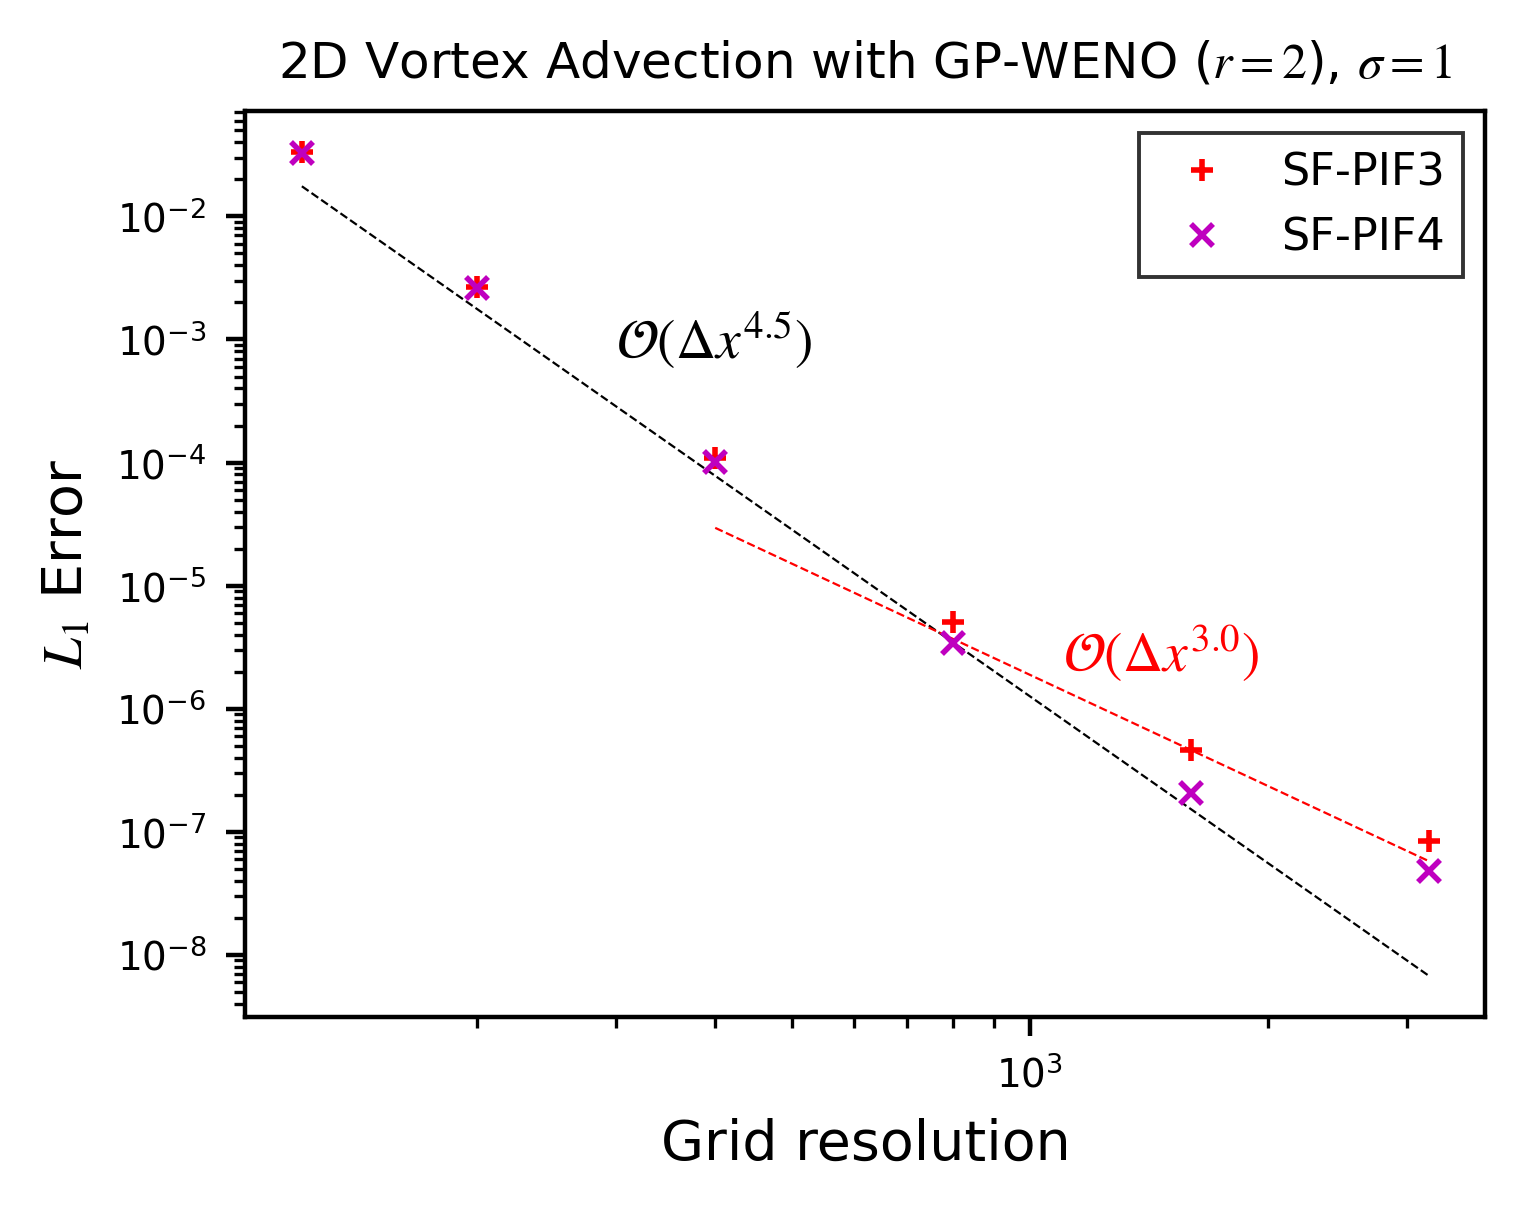

In [7]:
fig = plt.figure(figsize=(4,3), dpi=400)
ax = fig.add_subplot(1,1,1)

a = np.float64(bad_gp2_sf4.index[3])
b = bad_gp2_sf4["dens"][a]

a2 = np.float64(bad_gp2_sf3.index[4])
b2 = bad_gp2_sf3["dens"][a2]

# 4.5 order
line_order = 4.5
ax.plot(NN, (b*a**line_order)*(NN)**(-line_order), 'k--', linewidth=0.4)
ax.annotate(r'$\mathcal{{O}} (\Delta x^{{{}}})$'.format(line_order), xy=(3.E2,7.E-4))

# 3 order
line_order2 = 3.0
ax.plot(NN[2:], (b2*a2**line_order2)*(NN[2:])**(-line_order2), 'r--', linewidth=0.4)
ax.annotate(r'$\mathcal{{O}} (\Delta x^{{{}}})$'.format(line_order2), xy=(1.1E3,2.E-6), color='r')

ax.plot(bad_gp2_sf3['dens'], 'r+', markersize=4, linewidth=0.5, label='SF-PIF3')

ax.plot(bad_gp2_sf4['dens'], 'mx', markersize=4, linewidth=0.5, label='SF-PIF4')




ax.loglog()

# ax.set_xlim(1.E1, 1.5E3)
# ax.set_ylim(1.E-8, 1.E-1)

legend = ax.legend(fontsize=8, numpoints=1, fancybox=False, edgecolor='k')
legend.get_frame().set_linewidth(.7)

ax.tick_params(axis='both', which='both', labelsize=7)
ax.set_title('2D Vortex Advection with GP-WENO ($r=2$), $\sigma=1$', fontsize=9)

ax.set_xlabel('Grid resolution')
ax.set_ylabel(r'$L_1$' + ' Error')



fig.savefig('./gp2_vortex_error_sigma1.pdf', bbox_inches='tight', pad_inches=0.05)

Text(0, 0.5, '$L_1$ Error')

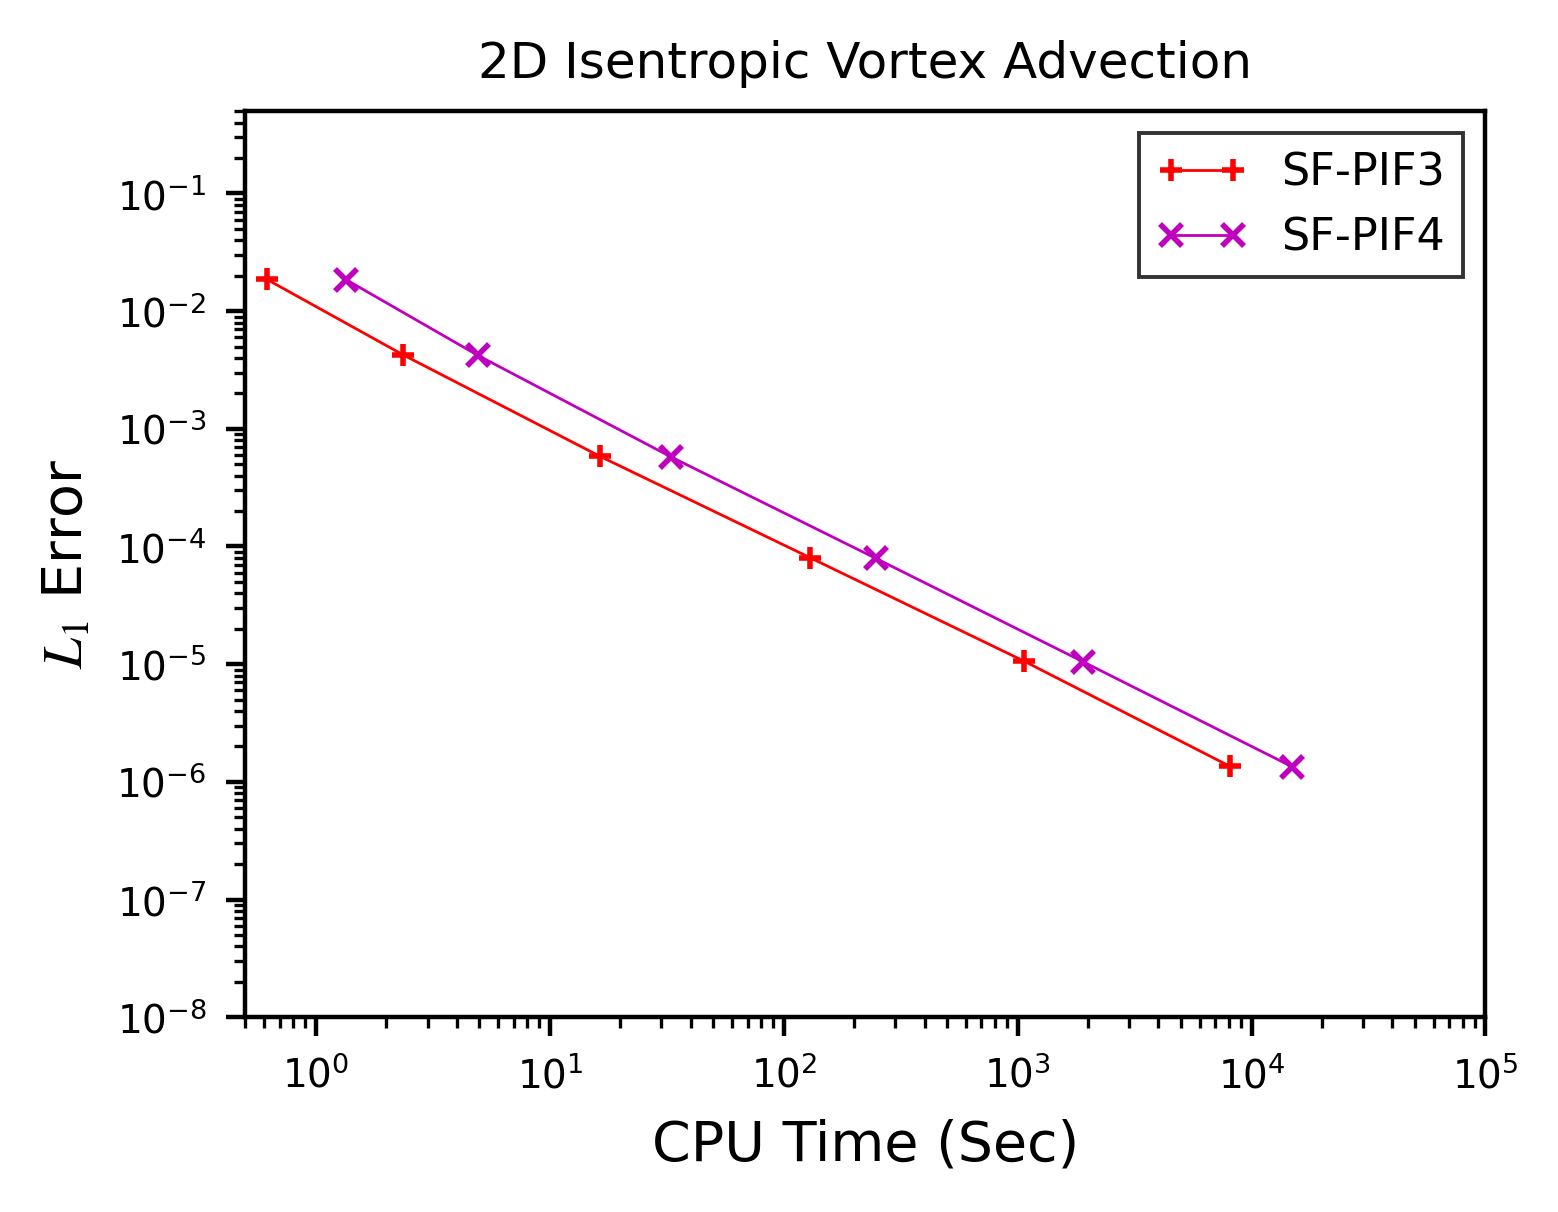

In [5]:
fig = plt.figure(figsize=(4,3), dpi=400)
ax = fig.add_subplot(1,1,1)

ax.plot(gp2_sf3['eTime'], gp2_sf3['dens'], 'r+-', markersize=4, linewidth=0.5, label='SF-PIF3')

ax.plot(gp2_sf4['eTime'], gp2_sf4['dens'], 'mx-', markersize=4, linewidth=0.5, label='SF-PIF4')






ax.loglog()

ax.set_xlim(0.5, 1.E5)
ax.set_ylim(1.E-8, 0.5)

legend = ax.legend(fontsize=8, numpoints=2, fancybox=False, edgecolor='k')
legend.get_frame().set_linewidth(.7)

ax.tick_params(axis='both', which='both', labelsize=7)
ax.set_title('2D Isentropic Vortex Advection', fontsize=9)

# # modify xticks
# ax.set_xticks([1., 10., sf3_tTime, rk3_tTime, 1000.])
# ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))


ax.set_xlabel('CPU Time (Sec)')
ax.set_ylabel(r'$L_1$' + ' Error')


# fig.savefig('./gp2_vortex_time_fourth.pdf', bbox_inches='tight', pad_inches=0)

In [6]:
gp2_sf3

,dens,velx,vely,pres,eTime,order
120,0.018642,0.071190,0.072877,0.023933,0.616065,NaN
200,0.004240,0.016152,0.016025,0.005505,2.365004,2.899153
400,0.000582,0.002363,0.002354,0.000768,16.428995,2.865060
800,0.000080,0.000341,0.000341,0.000105,130.076572,2.862319
1600,0.000011,0.000045,0.000045,0.000014,1069.496028,2.921651
3200,0.000001,0.000006,0.000006,0.000002,8086.829482,2.963954


In [7]:
gp2_sf4

,dens,velx,vely,pres,eTime,order
120,0.018549,0.071012,0.072840,0.024012,1.343489,NaN
200,0.004213,0.016029,0.015915,0.005504,4.918210,2.901656
400,0.000577,0.002341,0.002333,0.000768,32.953617,2.867742
800,0.000079,0.000338,0.000338,0.000105,247.188722,2.862701
1600,0.000010,0.000045,0.000045,0.000014,1904.551838,2.921456
3200,0.000001,0.000006,0.000006,0.000002,14914.668447,2.963304


120     0.458556
200     0.480867
400     0.498549
800     0.526224
1600    0.561547
3200    0.542206
Name: eTime, dtype: float64